<a href="https://colab.research.google.com/github/tejoramvakada91-hub/DL/blob/main/DL_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0
                                                  email  label
2995   abc s good morning america ranks it the NUMBE...      1
2996   hyperlink hyperlink hyperlink let mortgage le...      1
2997   thank you for shopping with us gifts for all ...      1
2998   the famous ebay marketing e course learn to s...      1
2999   hello this is chinese traditional 子 件 NUMBER世...      1
Epoch 1: Loss=0.3818, Accuracy=0.8529
Epoch 2: Loss=0.2768, Accuracy=0.8933
Epoch 3: Loss=0.2202, Accuracy=0.9241
Epoch 4: Loss=0.1844, Accuracy=0.9500
Epoch 5: Loss=0.1597, Accuracy=0.9608
Epoch 6: Loss=0.1414, Accuracy=0.9683
Epoch 7: Loss=0.1

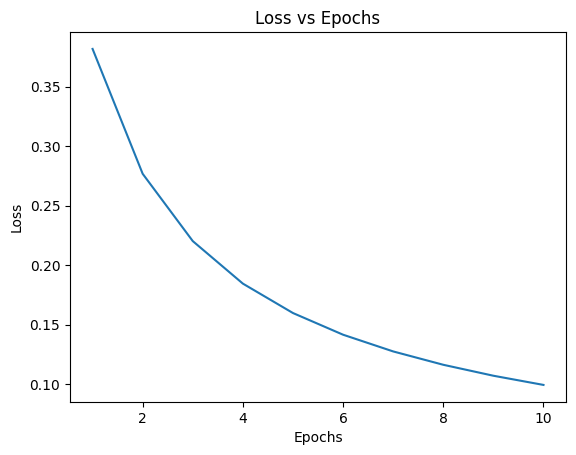

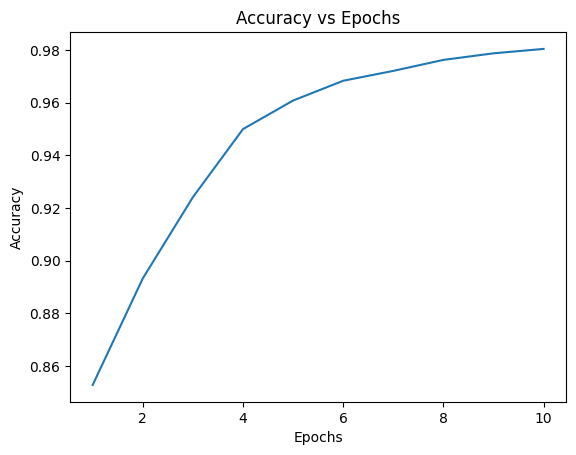

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# =========================
# 1. Load Dataset
# =========================
df = pd.read_csv("/content/spam_or_not_spam (2).csv")

print("Dataset Preview:")
print(df.head())
print(df.tail())

# Handle NaN values in the 'email' and 'label' columns
df.dropna(subset=['email', 'label'], inplace=True)

# Assuming dataset has columns: 'email' and 'label'
# (Change column names if needed)

X = df['email']
y = df['label']

# =========================
# 2. Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# 3. TF-IDF Feature Extraction
# =========================
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

# =========================
# 4. Single Neuron Model
# =========================
epochs = 10
learning_rate = 0.1

w = np.zeros(X_train_tfidf.shape[1])
b = 0

loss_list = []
accuracy_list = []

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# =========================
# 5. Training
# =========================
for epoch in range(epochs):

    total_loss = 0

    for x, y_true in zip(X_train_tfidf, y_train):

        # Forward Pass
        z = np.dot(x, w) + b
        y_pred = sigmoid(z)

        # Loss (Binary Cross Entropy)
        loss = -(y_true*np.log(y_pred+1e-9) +
                (1-y_true)*np.log(1-y_pred+1e-9))
        total_loss += loss

        # Backward Pass
        error = y_pred - y_true
        dw = error * x
        db = error

        # Update
        w -= learning_rate * dw
        b -= learning_rate * db

    # Store loss
    loss_list.append(total_loss / len(X_train_tfidf))

    # Calculate training accuracy
    preds = sigmoid(np.dot(X_train_tfidf, w) + b)
    preds = [1 if i >= 0.5 else 0 for i in preds]
    acc = accuracy_score(y_train, preds)
    accuracy_list.append(acc)

    print(f"Epoch {epoch+1}: Loss={loss_list[-1]:.4f}, Accuracy={acc:.4f}")

# =========================
# 6. Testing
# =========================
test_preds = sigmoid(np.dot(X_test_tfidf, w) + b)
test_preds = [1 if i >= 0.5 else 0 for i in test_preds]

# =========================
# 7. Evaluation Metrics
# =========================
print("\nEvaluation on Test Data:")
print("Accuracy:", accuracy_score(y_test, test_preds))
print("Precision:", precision_score(y_test, test_preds))
print("Recall:", recall_score(y_test, test_preds))
print("F1 Score:", f1_score(y_test, test_preds))

# =========================
# 8. Visualization
# =========================
plt.figure()
plt.plot(range(1, epochs+1), loss_list)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(range(1, epochs+1), accuracy_list)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()